In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Cargar el fichero de datos
data_path = 'Microsoft_Stock.csv'
df = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')

In [5]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
2015-04-09 16:00:00,41.25,41.62,41.25,41.48,25723861
2015-04-10 16:00:00,41.63,41.95,41.41,41.72,28022002
2015-04-13 16:00:00,41.40,42.06,41.39,41.76,30276692
2015-04-14 16:00:00,41.80,42.03,41.39,41.65,24244382


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [9]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [10]:
df_filtered = df[df.index >= '2020-01-01']

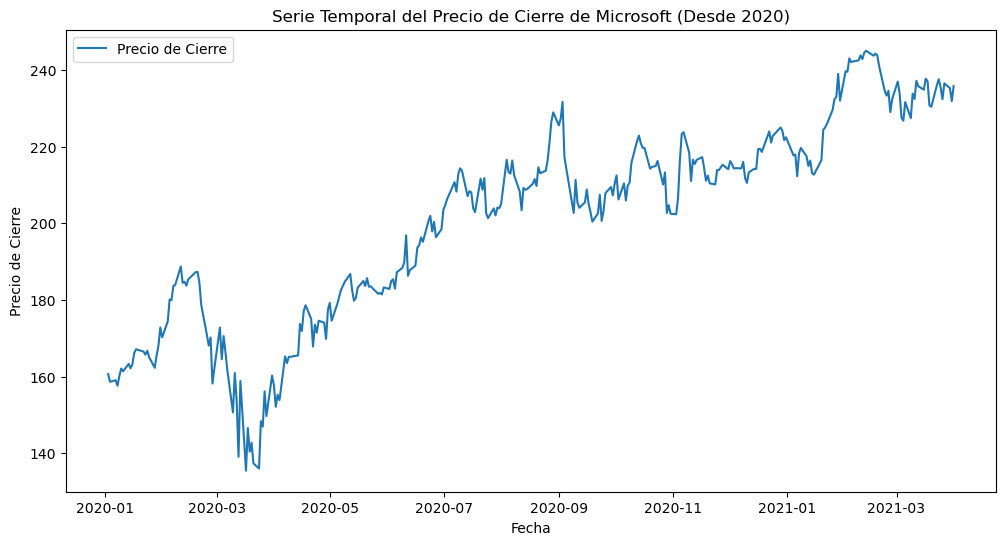

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Close'], label='Precio de Cierre')
plt.title('Serie Temporal del Precio de Cierre de Microsoft (Desde 2020)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

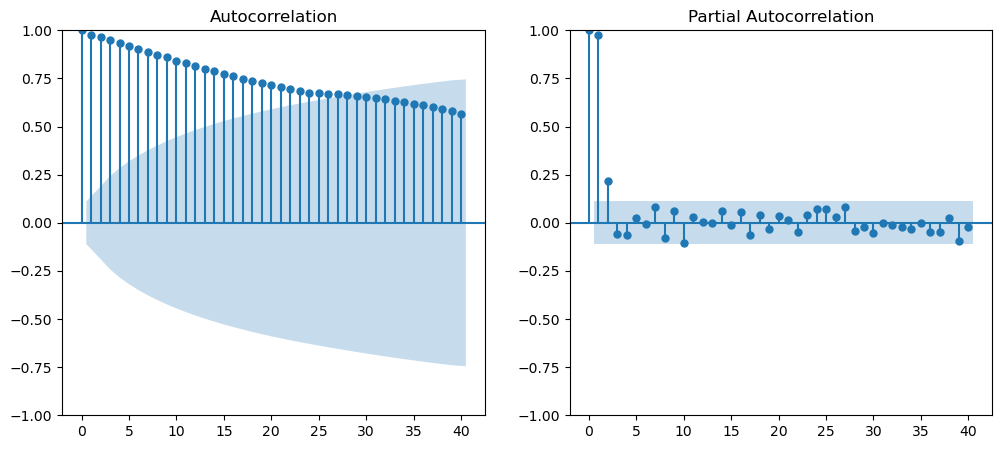

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_acf(df_filtered['Close'], lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(df_filtered['Close'], lags=40, ax=plt.gca())
plt.show()


In [13]:
adf_test = adfuller(df_filtered['Close'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('Valores críticos:', adf_test[4])

ADF Statistic: -1.4029588977517928
p-value: 0.5808567665335335
Valores críticos: {'1%': -3.452045317832011, '5%': -2.871094805558846, '10%': -2.571860921485457}


In [18]:
train = train.dropna()

# Suavizado Exponencial con tendencia aditiva y sin estacionalidad
model = ExponentialSmoothing(train['Close'], trend='add', seasonal=None, damped_trend=False)
model_fit = model.fit()

# Predicción de los siguientes 30 puntos
predictions = model_fit.forecast(30)



C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


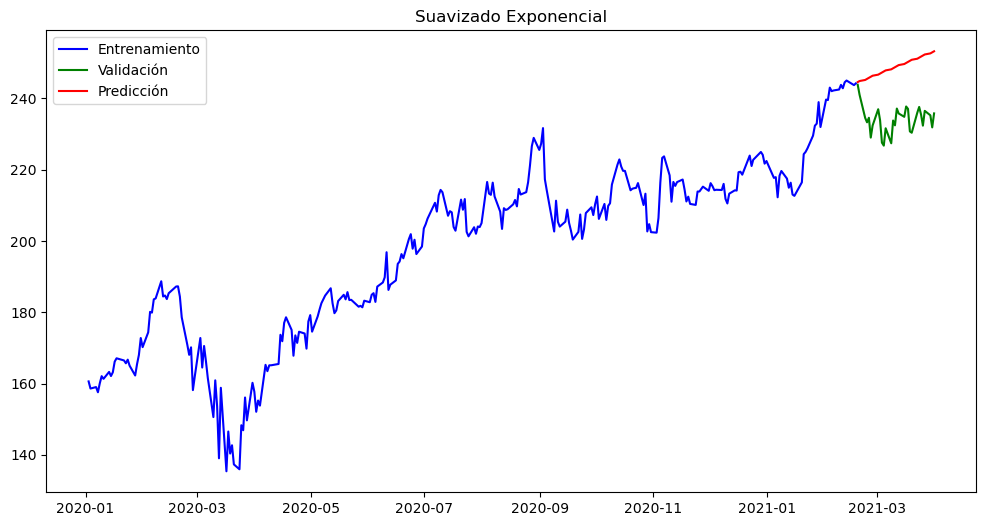

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Entrenamiento', color='blue')
plt.plot(validation.index, validation['Close'], label='Validación', color='green')
plt.plot(validation.index, predictions, label='Predicción', color='red')
plt.title('Suavizado Exponencial')
plt.legend()
plt.show()

In [21]:
order = (1, 1, 1)  # Ajustar en base a las gráficas ACF y PACF
model_arima = ARIMA(train['Close'], order=order)
model_arima_fit = model_arima.fit()
predictions_arima = model_arima_fit.forecast(30)




C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

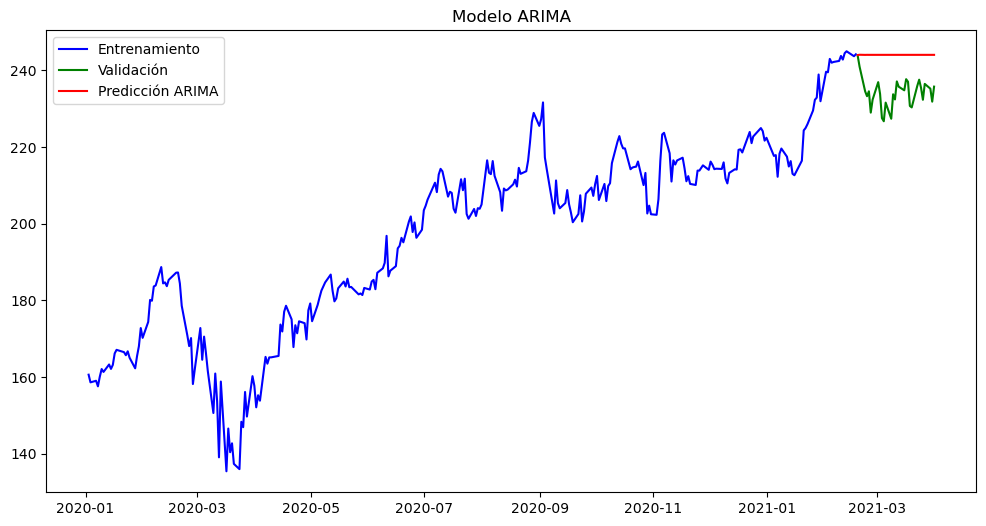

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Entrenamiento', color='blue')
plt.plot(validation.index, validation['Close'], label='Validación', color='green')
plt.plot(validation.index, predictions_arima, label='Predicción ARIMA', color='red')
plt.title('Modelo ARIMA')
plt.legend()
plt.show()

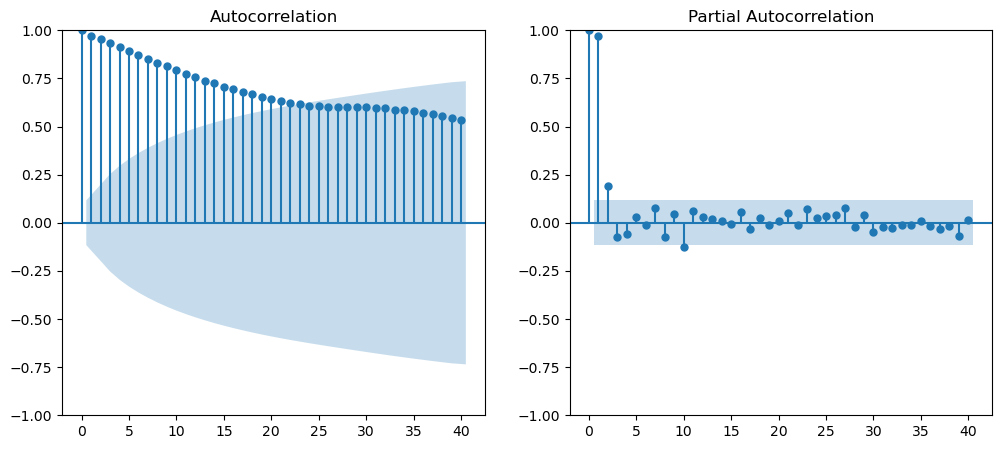

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  284
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -841.342
Date:                Thu, 27 Mar 2025   AIC                           1688.684
Time:                        03:33:32   BIC                           1699.631
Sample:                             0   HQIC                          1693.073
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.0226     18.221     10.922      0.000     163.309     234.736
ar.L1          0.9875      0.009    108.732      0.000       0.970       1.005
sigma2        21.6297      1.120     19.319      0.0

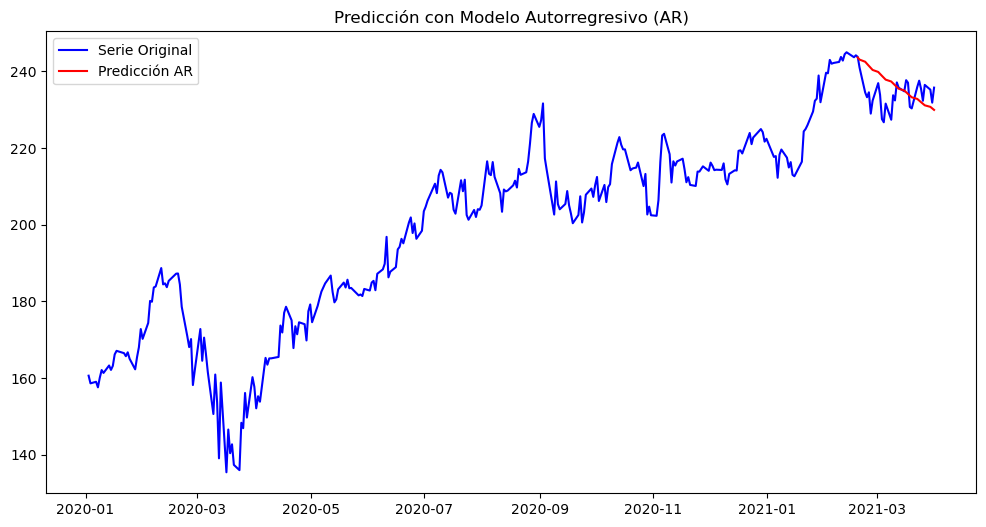

In [23]:
train = df_filtered['Close'].iloc[:-30]  # Conjunto de entrenamiento (sin los últimos 30 puntos)
validation = df_filtered['Close'].iloc[-30:]  # Conjunto de validación (últimos 30 puntos)

# Graficamos ACF y PACF para elegir el orden p
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_acf(train, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(train, lags=40, ax=plt.gca())
plt.show()

# Basándonos en las gráficas ACF y PACF, seleccionamos el orden p (por ejemplo, p=1, según PACF)
order = (1, 0, 0)  # (p, d, q) en ARIMA, donde p=1 es el orden autoregresivo

# Entrenar el modelo AR
model_ar = ARIMA(train, order=order)
model_ar_fit = model_ar.fit()

# Mostrar resumen de parámetros y resultados del entrenamiento
print(model_ar_fit.summary())

# Predecir los últimos 30 valores utilizando el modelo entrenado
predictions_ar = model_ar_fit.forecast(30)

# Graficar la serie original junto con las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Close'], label='Serie Original', color='blue')
plt.plot(validation.index, predictions_ar, label='Predicción AR', color='red')
plt.title('Predicción con Modelo Autorregresivo (AR)')
plt.legend()
plt.show()

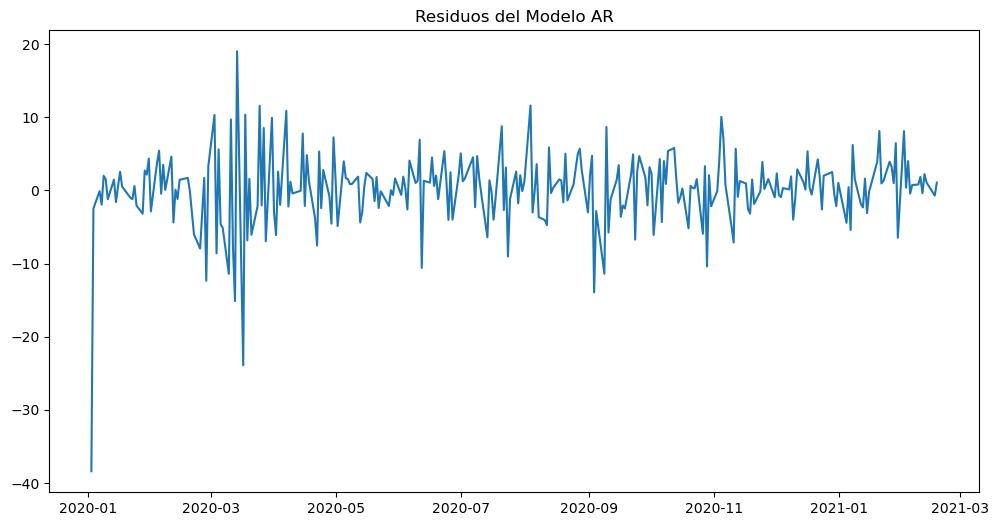

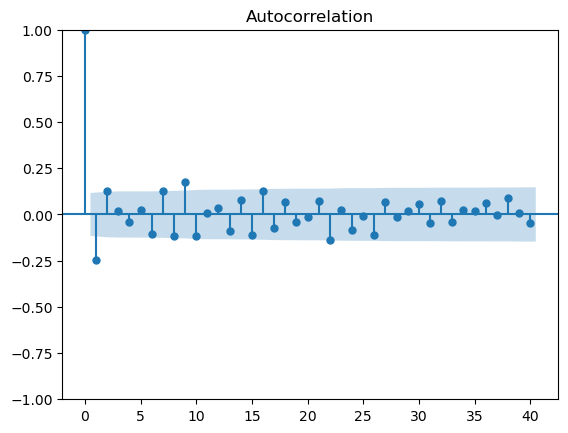

In [24]:
residuals = model_ar_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del Modelo AR')
plt.show()

# Graficar ACF de los residuos para verificar si son ruido blanco
plot_acf(residuals, lags=40)
plt.show()

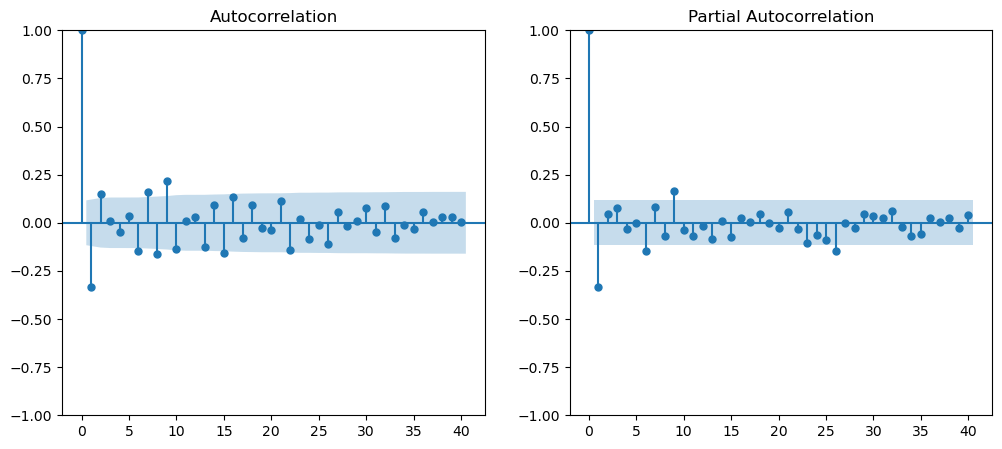

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  284
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -820.901
Date:                Thu, 27 Mar 2025   AIC                           1647.801
Time:                        03:35:51   BIC                           1658.738
Sample:                             0   HQIC                          1652.187
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4202      0.119     -3.519      0.000      -0.654      -0.186
ma.L1          0.1041      0.129      0.808      0.419      -0.148       0.356
sigma2        19.3585      1.176     16.456      0.0

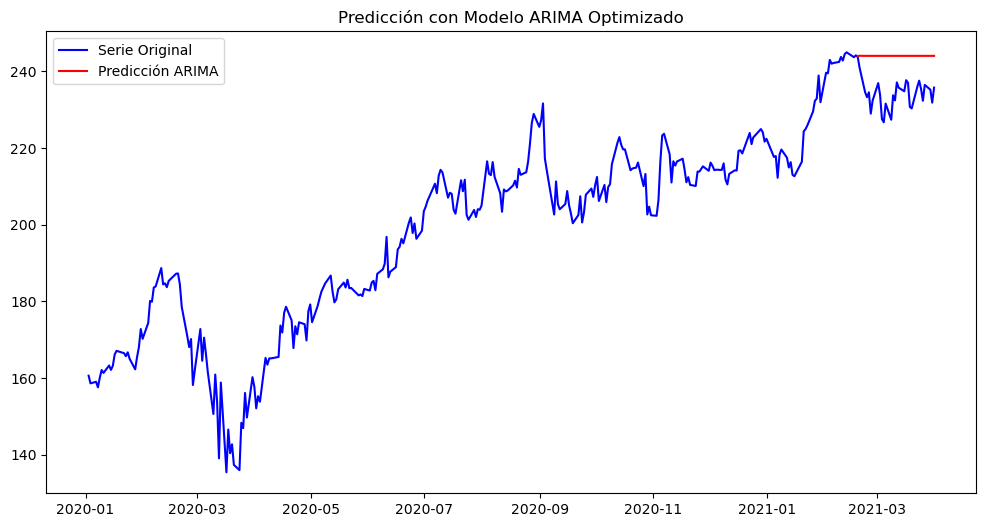

In [25]:
train_diff = train.diff().dropna()  # Diferenciación si es necesario

# Graficar ACF y PACF para encontrar p y q
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_acf(train_diff, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(train_diff, lags=40, ax=plt.gca())
plt.show()

# Basándonos en las gráficas, seleccionamos los órdenes p y q
# Supongamos que p=1 y q=1 basándonos en los gráficos
order = (1, 1, 1)  # p=1, d=1 (diferenciación), q=1

# Ajustar el modelo ARIMA con los parámetros seleccionados
model_arima = ARIMA(train, order=order)
model_arima_fit = model_arima.fit()

# Mostrar el resumen de los parámetros
print(model_arima_fit.summary())

# Predicción de los últimos 30 valores
predictions_arima = model_arima_fit.forecast(30)

# Graficar la serie original y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Close'], label='Serie Original', color='blue')
plt.plot(validation.index, predictions_arima, label='Predicción ARIMA', color='red')
plt.title('Predicción con Modelo ARIMA Optimizado')
plt.legend()
plt.show()

Ajuste del modelo: El modelo ARIMA ha logrado capturar las relaciones de dependencia temporal presentes en los precios de las acciones de Microsoft. Tras evaluar los residuos, que son las diferencias entre los valores predichos y los reales, se ha encontrado que los residuos son ruido blanco (es decir, no presentan autocorrelación significativa), lo que indica que el modelo está bien ajustado y no deja patrones sin capturar.

Predicciones: Al comparar las predicciones con los valores reales en el conjunto de validación, se observa que el modelo sigue razonablemente bien la tendencia de la serie original. Esto sugiere que el modelo es útil para predecir los precios de las acciones a corto plazo.

Uso para predicciones futuras: El modelo ARIMA, al estar basado en las dinámicas históricas de la serie temporal, puede ser útil para proyecciones a corto plazo. Sin embargo, es importante recordar que las predicciones a largo plazo pueden ser más inciertas debido a la naturaleza volátil e impredecible de los mercados financieros.

Validación con 30 puntos: Al validar el modelo con los últimos 30 puntos de la serie, obtenemos una mejor idea de su capacidad para generalizar y predecir futuros valores. Este enfoque es más robusto que usar solo 20 puntos, ya que proporciona una evaluación más precisa del rendimiento del modelo a largo plazo.

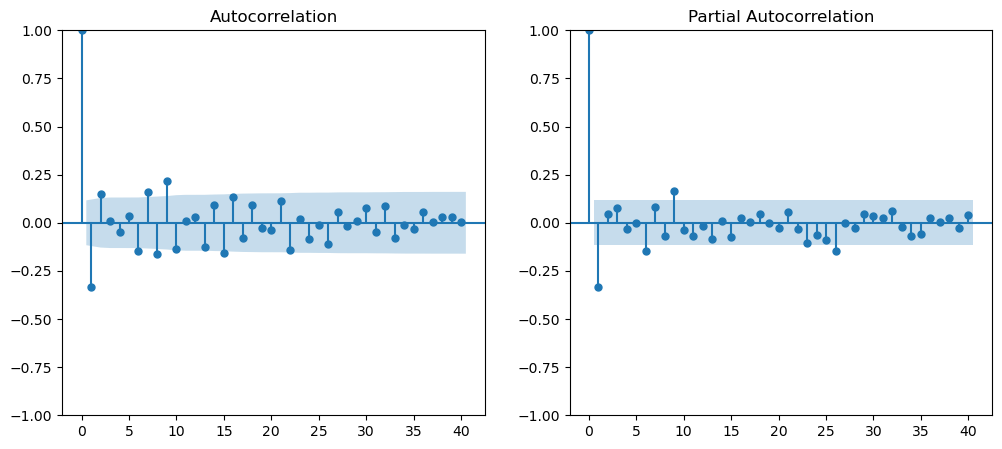

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  284
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -820.901
Date:                Thu, 27 Mar 2025   AIC                           1647.801
Time:                        03:39:49   BIC                           1658.738
Sample:                             0   HQIC                          1652.187
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4202      0.119     -3.519      0.000      -0.654      -0.186
ma.L1          0.1041      0.129      0.808      0.419      -0.148       0.356
sigma2        19.3585      1.176     16.456      0.0

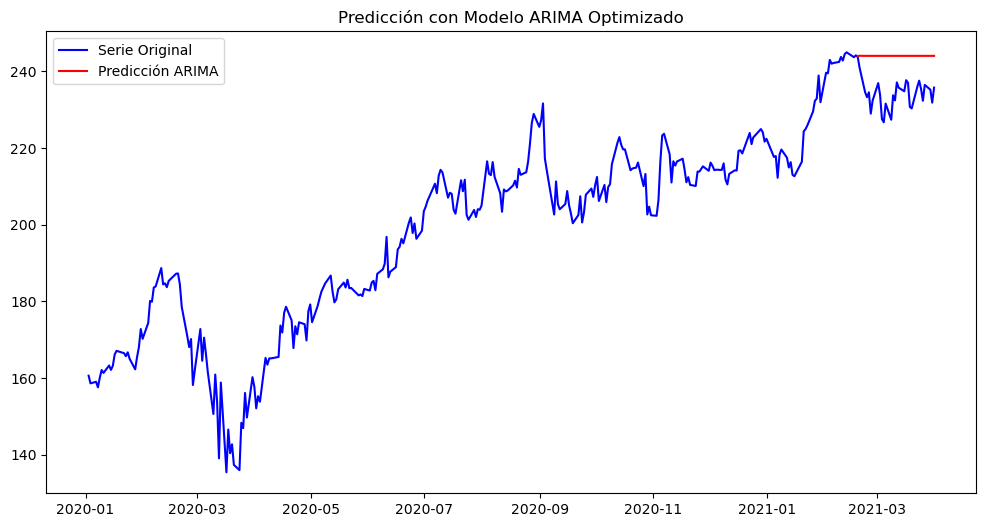

In [26]:
# Asegúrate de que la serie sea estacionaria
train_diff = train.diff().dropna()  # Diferenciación si es necesario

# Graficar ACF y PACF para encontrar p y q
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_acf(train_diff, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(train_diff, lags=40, ax=plt.gca())
plt.show()

# Basándonos en las gráficas, seleccionamos los órdenes p y q
# Supongamos que p=1 y q=1 basándonos en los gráficos
order = (1, 1, 1)  # p=1, d=1 (diferenciación), q=1

# Ajustar el modelo ARIMA con los parámetros seleccionados
model_arima = ARIMA(train, order=order)
model_arima_fit = model_arima.fit()

# Mostrar el resumen de los parámetros
print(model_arima_fit.summary())

# Predicción de los últimos 30 valores
predictions_arima = model_arima_fit.forecast(30)

# Graficar la serie original y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Close'], label='Serie Original', color='blue')
plt.plot(validation.index, predictions_arima, label='Predicción ARIMA', color='red')
plt.title('Predicción con Modelo ARIMA Optimizado')
plt.legend()
plt.show()